# Perceptrón multicapa

Consideraremos un perceptrón multicapa, con capas enumeradas por $l=0,1,...,L$. Denotemos por $x^l_i$ el estado de la $i$-ésima neurona en la capa $l$. Diremos que la red posee $n^l$ neuronas $i=1,...,n^l$ en la $l$-ésima capa. En particular, $x^0$ denota el vector de estados de la capa de entrada y $x^L$ el vector de estados de la capa de salida.
Se tiene que


\begin{equation}
x^l_i
=
g(h^l_i)
\;\;\;\;\;\;\;\; (1)
\end{equation}

donde $g:\mathbb{R}\to \mathbb{R}$ es una función de activación, por ejemplo una sigmoide $g(h)=1/(1+e^{-h})$, y

\begin{equation}
h^{l}_i
=
\sum_j w^{l}_{ij} x^{l-1}_j
\;\;\;\;\;\;\;\; (2)
\end{equation}

es el campo local sufrido por la $i$-ésima neurona en la $l$-ésima capa .
Además, $w^l_{ij}$ denota la intensidad de la sinapsis que conecta la $j$-ésima neurona en la $(l-1)$-ésima capa con la $i$-ésima neurona en la $l$-ésima capa.
Notar, la red depende de las matrices de pesos sinápticos $w^1,w^2,...,w^{L}$.

## Umbrales de activación

En cada una de las capas $l=0,1,...,L-1$, se agrega una neurona extra $i=n^l+1$ con un estado fijo $x^l_{n^l+1}=-1$. De esta manera, una nueva sinapsis $u^{l}_i:=w^{l}_{i,n^{l-1}+1}$ hace las veces de umbral de activación de la $i$-ésima neurona en la $l$-ésima capa, ya que

\begin{equation}
h^{l+1}_i
=
w^{l+1}_{i,n^{l}+1} x^{l}_{n^{l}+1}
+
\sum_{j=1}^{n^l} w^{l+1}_{ij} x^{l}_j
=
-
u^{l+1}_i
+
\sum_{j=1}^{n^l} w^{l+1}_{ij} x^l_j
\;\;\;\;\;\;\;\; (3)
\end{equation}

## Conjunto de entrenamiento

Los datos de entrenamiento consisten en un conjunto de pares $\{(e^m,s^m):m=1,...,M\}$ donde $e^m\in \mathbb{R}^{n_0}$ y $s^m\in \mathbb{R}^{n_L}$ son vectores que representan el $m$-ésimo par de entrada-salida o *ejemplo* que debe aprender la red.

## Función costo: el Error Cuadrático

Si pensamos que la salida de la red es una función de la entrada, i.e. que $x^L(x^0)$, podemos evaluar el error que comete la red sobre el conjunto de entramiento utilizando el *error cuadrático*
$$
E
=
\sum_{m=1}^M F^m
$$
como *función costo*, donde
$$
F^m
=
\frac{1}{2}
\sum_{i=1}^{n^L}
(x^L_i(x^0=e^m) - s^m_i)^2
$$
es el error cuadrático que comete la red sobre el $m$-ésimo ejemplo.

## Entrenamiento: descenso por el gradiente

Entrenar la red consisten en encontrar valores de los pesos sinápticos $w^l_{ij}$ que minimicen el error $E$.
Para ello, expresamos el error en función de dichos pesos y calculamos las componentes de su gradiente
$$
\frac{\partial E}{\partial w^l_{ij}}
=
\sum_m
\frac{\partial F^m}{\partial w^l_{ij}}
$$
De esta manera, podemos utilizar el algoritmo de descenso por el gradiente para actualizar los pesos hasta que el error alcance un mínimo global.
Más precisamente, partiendo de valores aleatorios
$(w^l_{ij})^0$ para los pesos sinápticos, actualizamos iterativamente a los mismos con la siguiente regla
\begin{equation}
(w^l_{ij})^{t+1} = (w^l_{ij})^t-\eta \frac{\partial F^m}{\partial w^l_{ij}}((w^l_{ij})^t)
\;\;\;\;\;\;\;\; (4)
\end{equation}
para todo $l$, $ij$ y $m$, donde el parámetro $0<\eta\ll 1$ controla la tasa de aprendizaje.
La iteración se detiene cuando ya no se advierten reducciones significativas del error $E$.

## Cálculo del gradiente del error cuadrático

Con el fin de simplificar la notación, elegimos un valor arbitrario de $m$ y obviamos la dependencia de las expresiones con éste índice.

Notar que los vectores $x^l$ y $h^l$ sólo dependen de las matrices $w^1,...,w^{l}$.
De esta manera, observamos que


\begin{equation}
\begin{aligned}
\frac{\partial x^l_i}{\partial w^r_{pq}}
&=&
g'(h^l_i)
\frac{\partial h^l_i}{\partial w^r_{pq}}
\nonumber
\end{aligned}
\end{equation}


si $r\leq l$, y
$$
\frac{\partial x^l_i}{\partial w^r_{pq}}=0
$$

en caso contrario.
Por otro lado,

\begin{equation}
\begin{aligned}
\frac{\partial h^{l}_i}{\partial w^r_{pq}}
&=&
\frac{\partial}{\partial w^r_{pq}}
\bigg(
\sum_j w^{l}_{ij} x^{l-1}_j
\bigg)
\nonumber
\\
&=&
\sum_j w^{l}_{ij}
\frac{\partial x^{l-1}_j}{\partial w^r_{pq}}
\nonumber
\end{aligned}
\end{equation}

si $r<l$, y
$$
\frac{\partial h^l_i}{\partial w^{l}_{pq}}
=
\sum_j
\delta_{ip}
\delta_{jq}
x^{l-1}_j
=
\delta_{ip}
x^{l-1}_q
$$
Con estas ecuaciones se pueden establecer una relación de recurrencia que nos permite calcular las componentes del gradiente de $F$.
A saber

\begin{equation}
\begin{aligned}
\frac{\partial F}{\partial w^r_{pq}}
&=&
\sum_i (x^L_i-s_i)
\frac{\partial x^L}{\partial w^r_{pq}}
\nonumber
\\
&=&
\sum_i (x^L_i-s_i)
g'(h^L_i)
\frac{\partial h^L_i}{\partial w^r_{pq}}
\nonumber
\\
&=&
\sum_i
D^L_i
\frac{\partial h^L_i}{\partial w^r_{pq}}
\nonumber
\\
&=&
\sum_i
D^L_i
\sum_j
w^L_{ij}
\frac{\partial x^{L-1}_i}{\partial w^r_{pq}}
\nonumber
\\
&=&
\sum_i
D^L_i
\sum_j
w^L_{ij}
g'(h^{L-1}_j)
\frac{\partial h^{L-1}_i}{\partial w^r_{pq}}
\nonumber
\\
&=&
\sum_j
\bigg(
g'(h^{L-1}_j)
\sum_i
w^L_{ij}
D^L_i
\bigg)
\frac{\partial h^{L-1}_i}{\partial w^r_{pq}}
\nonumber
\\
&=&
\sum_j
D^{L-1}_j
\frac{\partial h^{L-1}_i}{\partial w^r_{pq}}
\nonumber
\end{aligned}
\end{equation}


donde
\begin{equation}
D^L_i:=(x^L_i-s_i)g'(h^L_i)
\;\;\;\;\;\;\;\; (5)
\end{equation}
y
$$
D^{L-1}_j
:=
g'(h^{L-1}_j)
\sum_i
w^L_{ij}
D^L_i
$$
representan los *errores locales* de la $i$-ésima neurona en la $L$-ésima capa y la $j$-ésima neurona en la $(L-1)$-ésima capa, respectivamente.

El anterior procedimiento puede continuarse capa por capa, con cada capa $l$ tal que $r<l$, de manera que

\begin{equation}
\begin{aligned}
\frac{\partial F}{\partial w^r_{pq}}
&=&
\sum_j D_j^l
\frac{\partial h^l_j}{\partial w^r_{pq}}
\nonumber
\end{aligned}
\end{equation}

donde

\begin{equation}
\begin{aligned}
D_j^l
:=
g'(h^{l}_j)
\sum_i w^{l+1}_{ij}D_i^{l+1}
\;\;\;\;\;\;\;\; (6)
\end{aligned}
\end{equation}


hasta que eventualmente se alcanza la capa $l=r$, y se obtiene

\begin{equation}
\begin{aligned}
\frac{\partial F}{\partial w^r_{pq}}
&=&
\sum_j
D_j^{r}
\frac{\partial h^{r}_j}{\partial w^r_{pq}}
\nonumber
\\
&=&
\sum_j
D_j^{r}
\delta_{jp}
x^{r-1}_q
\nonumber
\\
&=&
D_p^{r}
x^{r-1}_q
\nonumber
\end{aligned}
\end{equation}

En particular, este último resultado se verifica para el caso $r=L$ de $pq$ arbitrario.
También se verifica para el caso en que $q=n^{r-1}+1$ y valores arbitrarios de $r$ y $p$, en donde $x_q^{r-1}=-1$ corresponde al estado fijo de la neurona en la capa $(r-1)$-ésima que permite simular la acción de umbrales en la capa $r$-ésima, tal como se describe en la Ec. 3.

## El algoritmo de backpropagation

Los resultados anteriores pueden condensarse en el llamado *algoritmo de backpropagation*, el cuál permite el cálculo del gradiente y la actualización de los pesos sinápticos, y consiste en la siguiente lista de pasos.
Para cada ejemplo $m=1,...,M$, ejecutar:
1. *Forward pass:* calcular la salida $x^L$ de la red ante la entrada $x^1=e^m$ utilizando las Ecs. 1 y 2. En el proceso, guardar los valores de activación $x^l$ y de los correspondientes campos locales $h^l$ obtenidos en las distintas capas $l=2,...,L$, ya que serán útiles más adelante.
2. Calcular el vector de errores $D^L$ de la capa de salida utilizando la Ec. 5.
3. Propagar los errores hacia atrás, i.e. calcular los errores $D^l$ para $l=L-1,L-2,...,1$ utilizando la Ec. 6.
4. Para cada $l$, $i$ y $j$, calcular el gradiente $\frac{\partial F^m}{\partial w^l_{ij}}$ utilizando la Ec. 7 y actualizar el correspondiente peso sináptico $w^l_{ij}$ utilizando la Ec. 4.

## **Ejercicio 1**

Genere un conjunto de entrenamiento compuesto por $M=\sum_c m_c$ puntos en $\mathbb{R}^{n_e}$ distribuidos en $n_s$ nubes de $m_c$ puntos.

Para generar las nubes:

* genere aleatoriamente $n_s$ puntos en $\mathbb{R}^{n_e}$ a los que llamaremos centros, sorteando los valores de las coordenadas a partir de una distribución normal, y

* para cada centro $c$, genere $m_c$ puntos aleatorios alrededor del mismo, sumando sus coordenadas a números aleatorios generados con una Gaussiana de varianza $\sigma^2$.

Las $n_e$ coordenadas del $m$-ésimo punto constituirán el vector de entrada del $m$-ésimo ejemplo.
La nube a la que pertenece el $m$-ésimo punto determinará el vector de salida del $m$-ésimo ejemplo.
Más precisamente, si el $m$-ésimo punto pertenence a la $c$-ésima nube, el vector de salida será el vector canónico $(0,0,...,1,...,0)$ de $n_s$ componentes con un único 1 en la $c$-esima posición.

Concretamente

1. Genere un conjunto de 8 puntos en $\mathbb{R}^{n_e}$ con $n_e=2$, divididos en 3 nubes con $m_1=3$ en la primera nube, $m_2=2$ puntos en la segunda nube y $m_3=3$ puntos en la tercera nube. Utilice $\sigma=0.1$ para indicar la dispersión de los puntos alrededor de cada nube.

2. Grafique las nubes de puntos, utilizando un color distinto para cada una de ellas.

## **Ejercicio 2**

1. Implemente un **perceptrón multicapa** con $n_e=2$ neuronas de entrada, una capa oculta de $n_o=2$ neuronas, y una capa de salida de $n_s=3$ neuronas. Recuerde, además, agregar las neuroas auxiliares que se utiliza para imitar los umbrales de activación. Utilice funciones de activación **sigmoideas**.

2. Entrenelo sobre el conjunto de ejemplos generado en el Ejercicio 1. Para entrenarlo, utilice una tasa $\eta=0.02$ y alrededor de 10.000 de épocas o más, según considere necesario.

3. Grafique el error $E$ en función del número de épocas de entrenamiento.

4. Luego, grafique nuevamente los puntos del Ejercicio 1, pintando el relleno de los mismos con los colores correspondiente a cada nube, y el borde de los mismos con el color correspondiente a la predicción obtenida con el **perceptrón multicapa**. Coinciden las predicciones con los colores originales?

5. Repita los experimentos con funciones de activación **ReLUs**. Que ocurre?

## **Ejercicio 3: la compuerta XOR**

1. Fabrique un dataset con el siguiente conjunto de 4 ejemplos:

    * $e_1 = (0,0)$, $s_1=(1,0)$
    * $e_2 = (0,1)$, $s_2=(0,1)$
    * $e_3 = (1,0)$, $s_3=(0,1)$
    * $e_4 = (1,1)$, $s_4=(1,0)$
    
  corresponde a la compuerta XOR.

2. Es el **perceptrón multicapa** capáz de aprender la compuerta XOR? Para responder esta pregunta, genere un **perceptrón multicapa** con $n_e=2$ neuronas de entrada, $n_o=2$ neuronas ocultas y $n_s=2$ neuronas de salida, y entrénelo utilizando el conjunto de ejemplos de la compuerta XOR.

3. Como se compara el **perceptrón multicapa** con el **perceptrón monocapa** sobre la compuerta XOR? Para responder esta otra pregunta, genere otro perceptrón "multicapa", pero esta vez utilizando solo dos capas, una de entrada con $n_e=2$ neuronas y una de salida con $n_s=2$ neuronas (de manera tal que en realidad es un perceptron monocapa), y repita el experimento anterior con los ejemplos de la compuerta XOR.

4. Repita los experimentos con funciones de activación **ReLUs**. Que ocurre?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1.1)

def generate_examples(list_m, n_e, sigma=0.1):
    centers = np.random.randn(len(list_m), n_e)
    #print(centers)
    M = sum(list_m)
    n_s = len(list_m)
    e = np.zeros((M, n_e))
    s = np.zeros((M, n_s))
    m = 0
    
    for c in range(n_s):
        for r in range(list_m[c]):
            e[m, :] = centers[c, :] + sigma * np.random.randn(n_e)
            s[m, c] = 1 
            m += 1

    return e, s

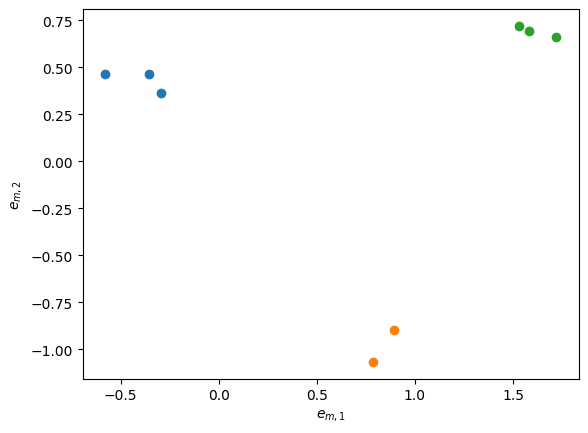

In [3]:
e, s = generate_examples([3, 2, 3], 2)

plt.figure()

colors = plt.cm.tab10.colors

for m in range(e.shape[0]):
    plt.scatter(e[m, 0], e[m, 1], c=[colors[np.argmax(s[m, :])]], label="")   

plt.xlabel(r'$e_{m, 1}$')
plt.ylabel(r'$e_{m, 2}$')
plt.show()

In [5]:
def relu(h):
    if h > 0:
        return h
    else:
        return 0
    
def d_relu(h):
    if h > 0:
        return 1.0
    else:
        return 0
    
def sigmoid(h):
    return 1.0 / (1.0 + np.exp(-h))

def d_sigmoid(h):
    gh = sigmoid(h)
    return gh*(1-gh)


In [8]:
# 2.1)
# Función de entrenamiento
def train(X_train, y_train, input_size=2, hidden_size=2, output_size=3, learning_rate=0.02, epochs=10000, activation='sigmoid'):
    # Inicializar pesos y biases
    np.random.seed(42)
    weights_input_hidden = np.random.rand(input_size, hidden_size)
    bias_hidden = np.random.rand(hidden_size)
    weights_hidden_output = np.random.rand(hidden_size, output_size)
    bias_output = np.random.rand(output_size)
    
    # Seleccionar la función de activación
    if activation == 'sigmoid':
        activation_func = sigmoid
        activation_derivative = d_sigmoid
    elif activation == 'relu':
        activation_func = relu
        activation_derivative = d_relu
    else:
        raise ValueError("Función de activación no soportada: elige 'sigmoid' o 'relu'.")

    errors = []
    for epoch in range(epochs):
        # Forward pass
        hidden_input = np.dot(X_train, weights_input_hidden) + bias_hidden
        hidden_output = activation_func(hidden_input)

        final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
        final_output = sigmoid(final_input)  # La salida final usa sigmoid para clasificación

        # Calcular el error
        error = y_train - final_output
        errors.append(np.mean(np.abs(error)))

        # Backpropagation
        d_output = error * d_sigmoid(final_output)  # Derivada siempre para sigmoid en salida
        error_hidden_layer = d_output.dot(weights_hidden_output.T)
        d_hidden = error_hidden_layer * activation_derivative(hidden_output)

        # Actualizar pesos y biases
        weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
        bias_output += np.sum(d_output, axis=0) * learning_rate
        weights_input_hidden += X_train.T.dot(d_hidden) * learning_rate
        bias_hidden += np.sum(d_hidden, axis=0) * learning_rate

        if epoch % (epochs // 10) == 0:
            print(f"Epoch {epoch} Error {errors[epoch]}")
    
    # Graficar el error en función del número de épocas
    plt.plot(errors)
    plt.xlabel('Épocas')
    plt.ylabel('Error')
    plt.title('Error en función del número de épocas')
    plt.show()

    # Retornar los pesos y biases entrenados
    return weights_input_hidden, bias_hidden, weights_hidden_output, bias_output

# Función de evaluación
def evaluate(X_test, y_test, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output, activation='sigmoid'):
    # Seleccionar la función de activación
    if activation == 'sigmoid':
        activation_func = sigmoid
    elif activation == 'relu':
        activation_func = relu
    else:
        raise ValueError("Función de activación no soportada: elige 'sigmoid' o 'relu'.")

    # Forward pass en datos de prueba
    hidden_input = np.dot(X_test, weights_input_hidden) + bias_hidden
    hidden_output = activation_func(hidden_input)

    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    # Asignar la clase con la mayor probabilidad como predicción
    predictions = np.argmax(final_output, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    # Graficar resultados
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_classes, marker='o', edgecolor='k', label='Clases reales')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, marker='o', facecolors='none', edgecolor='r', label='Predicciones')
    plt.legend()
    plt.title('Predicciones vs Clases Reales')
    plt.show()

    # Calcular y mostrar precisión
    accuracy = np.mean(predictions == y_test_classes)
    print(f'Precisión en los datos de prueba: {accuracy * 100:.2f}%')

Epoch 0 Error 0.5742123185406135
Epoch 1000 Error 0.19889501312220811
Epoch 2000 Error 0.09668557596072991
Epoch 3000 Error 0.06473870987523718
Epoch 4000 Error 0.04914640662428544
Epoch 5000 Error 0.03999536748790928
Epoch 6000 Error 0.033996500802569905
Epoch 7000 Error 0.029757707277973233
Epoch 8000 Error 0.026595333322677762
Epoch 9000 Error 0.024137021661962733


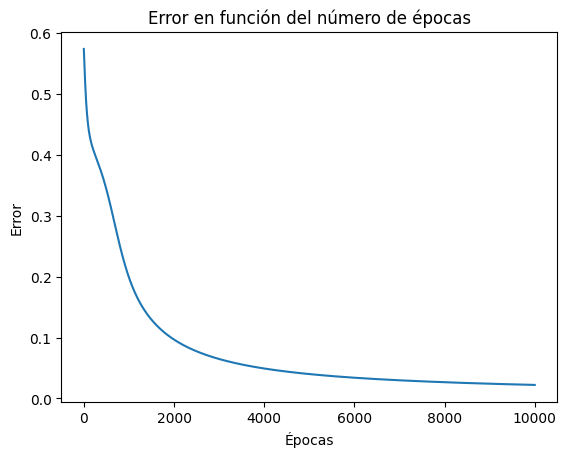

In [9]:
w = train(e, s, input_size=2, hidden_size=2, output_size=3, learning_rate=0.02, epochs=10000, activation='sigmoid')

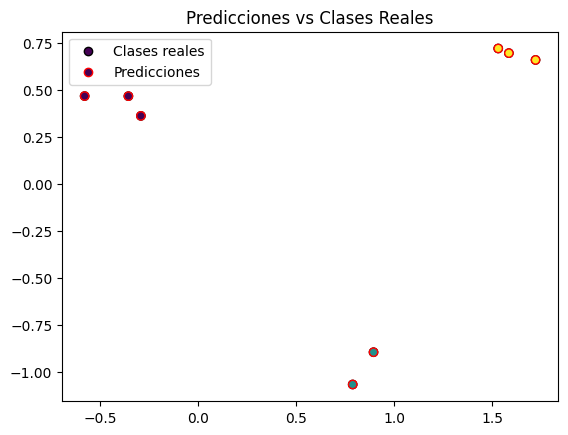

Precisión en los datos de prueba: 100.00%


In [10]:
evaluate(e, s, *w, activation='sigmoid')